In [2]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , roc_auc_score, roc_curve, auc , precision_recall_curve, confusion_matrix, accuracy_score, f1_score, recall_score, r2_score, precision_score, classification_report, root_mean_squared_error, mean_squared_error
import joblib
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df_train=pd.read_csv("C:/Users/Asus/Downloads/Backorder_Training_Dataset_v2.csv")
df_test=pd.read_csv("C:/Users/Asus/Downloads/Backorder_Test_Dataset_v2.csv")

C:\Users\Asus\AppData\Local\Temp\ipykernel_29712\2669923111.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("C:/Users/Asus/Downloads/Backorder_Training_Dataset_v2.csv")
C:\Users\Asus\AppData\Local\Temp\ipykernel_29712\2669923111.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test=pd.read_csv("C:/Users/Asus/Downloads/Backorder_Test_Dataset_v2.csv")


In [4]:
## Cleaning Train data
null_index = df_train[df_train['national_inv'].isnull()].index.tolist()
df_train = df_train.drop(null_index)
df_train['lead_time'] = df_train['lead_time'].fillna(df_train['lead_time'].median())
df_train['perf_6_month_avg'] = df_train['perf_6_month_avg'].replace(-99.00,0.99)
df_train['perf_12_month_avg'] = df_train['perf_12_month_avg'].replace(-99.00,0.99)
df_train.drop(['sku'], axis=1, inplace=True)
mapping = {'Yes': 0, 'No': 1}
mapping_target = {'Yes':1, 'No':0}
df_train['potential_issue'] = df_train['potential_issue'].map(mapping)
df_train['deck_risk'] = df_train['deck_risk'].map(mapping)
df_train['oe_constraint'] = df_train['oe_constraint'].map(mapping)
df_train['ppap_risk'] = df_train['ppap_risk'].map(mapping)
df_train['stop_auto_buy'] = df_train['stop_auto_buy'].map(mapping)
df_train['rev_stop'] = df_train['rev_stop'].map(mapping)
df_train['went_on_backorder'] = df_train['went_on_backorder'].map(mapping_target)

In [5]:
## Cleaning Test Data
null_index = df_test[df_test['national_inv'].isnull()].index.tolist()
df_test = df_test.drop(null_index)
df_test['lead_time'] = df_test['lead_time'].fillna(df_test['lead_time'].median())
df_test['perf_6_month_avg'] = df_test['perf_6_month_avg'].replace(-99.00,0.99)
df_test['perf_12_month_avg'] = df_test['perf_12_month_avg'].replace(-99.00,0.99)
df_test.drop(['sku'], axis=1, inplace=True)
mapping = {'Yes': 0, 'No': 1}
df_test['potential_issue'] = df_test['potential_issue'].map(mapping)
df_test['deck_risk'] = df_test['deck_risk'].map(mapping)
df_test['oe_constraint'] = df_test['oe_constraint'].map(mapping)
df_test['ppap_risk'] = df_test['ppap_risk'].map(mapping)
df_test['stop_auto_buy'] = df_test['stop_auto_buy'].map(mapping)
df_test['rev_stop'] = df_test['rev_stop'].map(mapping)
df_test['went_on_backorder'] = df_test['went_on_backorder'].map(mapping_target)

In [6]:
X=df_train.drop('went_on_backorder',axis=1) ## Train
y=df_train['went_on_backorder']
X_test=df_test.drop('went_on_backorder',axis=1) ## Test
y_test=df_test['went_on_backorder']

In [7]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [8]:
lr_model = LogisticRegression(random_state=42, solver="liblinear")
lr_model.fit(X_train_resampled,y_train_resampled)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.70      0.83    239387
           1       0.03      0.81      0.06      2688

    accuracy                           0.71    242075
   macro avg       0.51      0.76      0.44    242075
weighted avg       0.99      0.71      0.82    242075



In [17]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled,y_train_resampled)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    239387
           1       0.07      0.44      0.12      2688

    accuracy                           0.93    242075
   macro avg       0.53      0.68      0.54    242075
weighted avg       0.98      0.93      0.95    242075



In [29]:
lr_model = LogisticRegression(random_state=42, max_iter=100)
lr_model.fit(X_train_resampled,y_train_resampled)
y_pred_test = lr_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    239387
           1       0.07      0.44      0.12      2688

    accuracy                           0.93    242075
   macro avg       0.53      0.68      0.54    242075
weighted avg       0.98      0.93      0.95    242075



In [30]:
y_pred_train = lr_model.predict(X_train_resampled)
print(classification_report(y_train_resampled,y_pred_train))


              precision    recall  f1-score   support

           0       0.64      0.93      0.76   1676567
           1       0.87      0.49      0.63   1676567

    accuracy                           0.71   3353134
   macro avg       0.76      0.71      0.69   3353134
weighted avg       0.76      0.71      0.69   3353134



In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

lr_model_s = LogisticRegression(random_state=42)
lr_model_s.fit(X_train_scaled,y_train_resampled)
y_pred_s = lr_model_s.predict(X_test_scaled)
print(classification_report(y_test,y_pred_s))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.67      0.80    239387
           1       0.02      0.60      0.04      2688

    accuracy                           0.67    242075
   macro avg       0.51      0.64      0.42    242075
weighted avg       0.98      0.67      0.79    242075



In [26]:
pd.DataFrame({"Feature":X_train_resampled.columns.to_list(),"Coefficients":lr_model_s.coef_[0]})


,Feature,Coefficients
0,national_inv,-70.386212
1,lead_time,-0.399431
2,in_transit_qty,-21.863318
3,forecast_3_month,-4.469718
4,forecast_6_month,6.178126
5,forecast_9_month,3.405088
6,sales_1_month,-1.957491
7,sales_3_month,5.073691
8,sales_6_month,-2.596696
9,sales_9_month,5.911717


<Axes: >

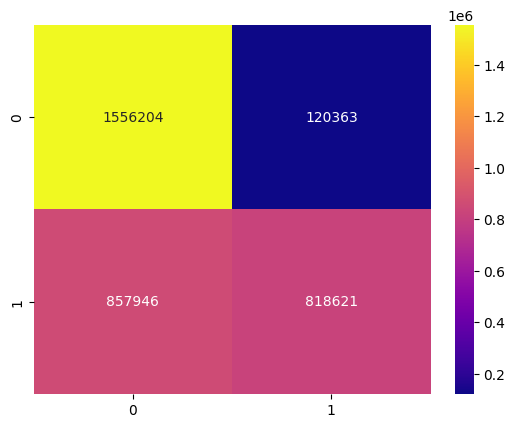

In [32]:
sns.heatmap(confusion_matrix(y_train_resampled,y_pred_train),annot=True, fmt='d',cbar=True,cmap="plasma")

In [33]:
y_train_proba = lr_model.predict_proba(X_train_resampled)
y_test_proba = lr_model.predict_proba(X_test)

In [34]:
def plot_prediction_probabilities(y_true, y_pred_proba, title='Prediction Probabilities'):
    sns.histplot(y_pred_proba[y_true == 0], color='blue', kde=True, label='Class 0')
    sns.histplot(y_pred_proba[y_true == 1], color='red', kde=True, label='Class 1')
    plt.title(title)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()

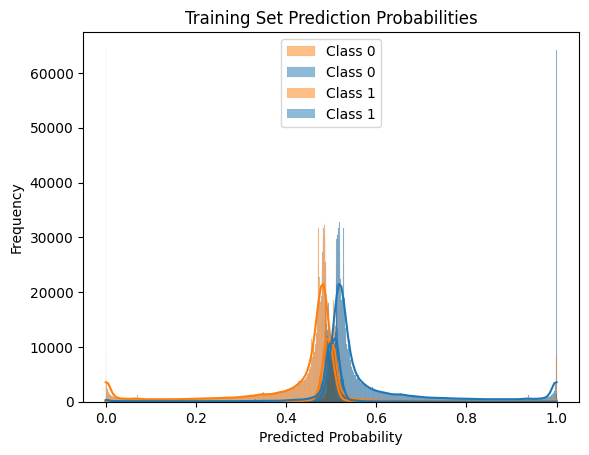

In [35]:
plot_prediction_probabilities(y_train_resampled, y_train_proba, title='Training Set Prediction Probabilities')

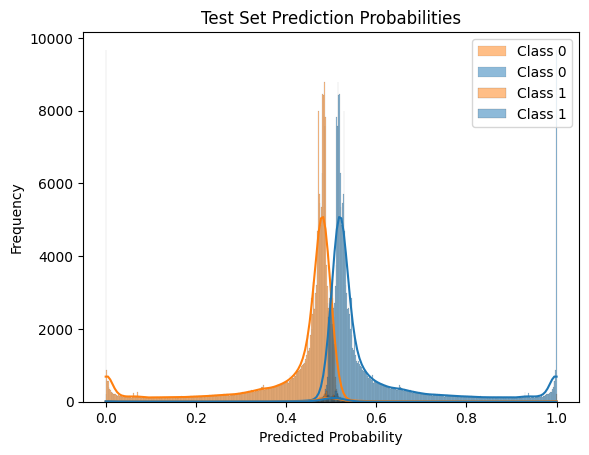

In [36]:
plot_prediction_probabilities(y_test, y_test_proba, title='Test Set Prediction Probabilities')

ROC AUC: 0.8450713032762053


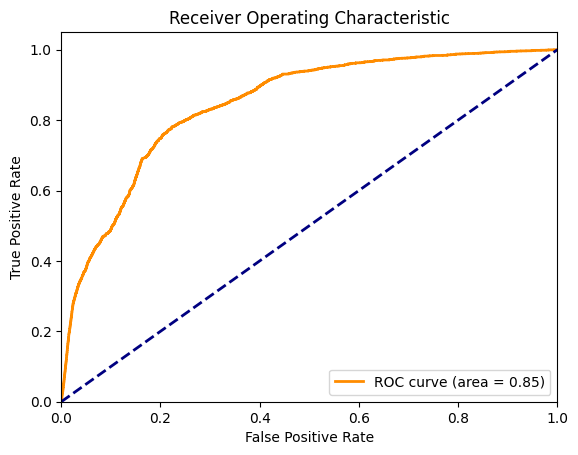

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print AUC
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [39]:
thresholds

array([            inf, 1.00000000e+000, 1.00000000e+000, ...,
       1.23349003e-057, 2.16706850e-297, 0.00000000e+000])

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

lr_model_s = LogisticRegression(random_state=42)
lr_model_s.fit(X_train_scaled,y_train_resampled)
y_pred_s = lr_model_s.predict(X_test_scaled)
print(classification_report(y_test,y_pred_s))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.67      0.80    239387
           1       0.02      0.60      0.04      2688

    accuracy                           0.67    242075
   macro avg       0.51      0.64      0.42    242075
weighted avg       0.98      0.67      0.79    242075



In [43]:
y_pred_train = lr_model_s.predict(X_train_resampled)
print(classification_report(y_train_resampled,y_pred_train))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.92      0.85   1676567
           1       0.90      0.75      0.82   1676567

    accuracy                           0.83   3353134
   macro avg       0.84      0.83      0.83   3353134
weighted avg       0.84      0.83      0.83   3353134



In [59]:
y_train_proba = lr_model_s.predict_proba(X_train_resampled)
y_test_proba = lr_model_s.predict_proba(X_test_scaled)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [61]:
pd.DataFrame({"Feature":X_train_resampled.columns.to_list(),"Coefficients":lr_model_s.coef_[0]})

,Feature,Coefficients
0,national_inv,-70.386212
1,lead_time,-0.399431
2,in_transit_qty,-21.863318
3,forecast_3_month,-4.469718
4,forecast_6_month,6.178126
5,forecast_9_month,3.405088
6,sales_1_month,-1.957491
7,sales_3_month,5.073691
8,sales_6_month,-2.596696
9,sales_9_month,5.911717


<Axes: >

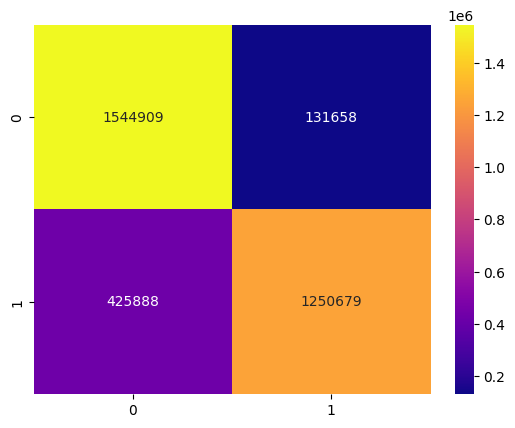

In [62]:
sns.heatmap(confusion_matrix(y_train_resampled,y_pred_train),annot=True, fmt='d',cbar=True,cmap="plasma")

In [63]:
def plot_prediction_probabilities(y_true, y_pred_proba, title='Prediction Probabilities'):
    sns.histplot(y_pred_proba[y_true == 0], color='blue', kde=True, label='Class 0')
    sns.histplot(y_pred_proba[y_true == 1], color='red', kde=True, label='Class 1')
    plt.title(title)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()

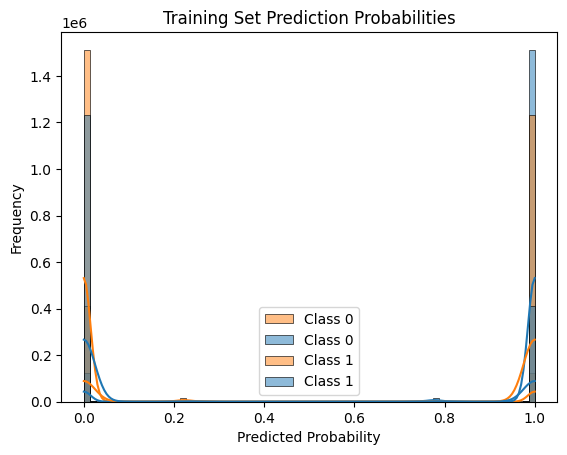

In [64]:
plot_prediction_probabilities(y_train_resampled, y_train_proba, title='Training Set Prediction Probabilities')

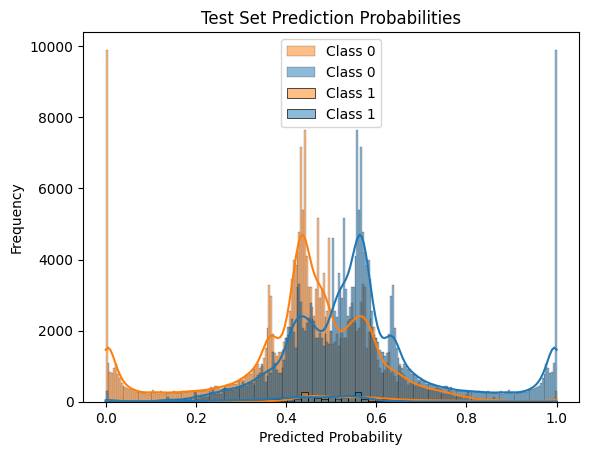

In [65]:
plot_prediction_probabilities(y_test, y_test_proba, title='Test Set Prediction Probabilities')

ROC AUC: 0.7155278750666135


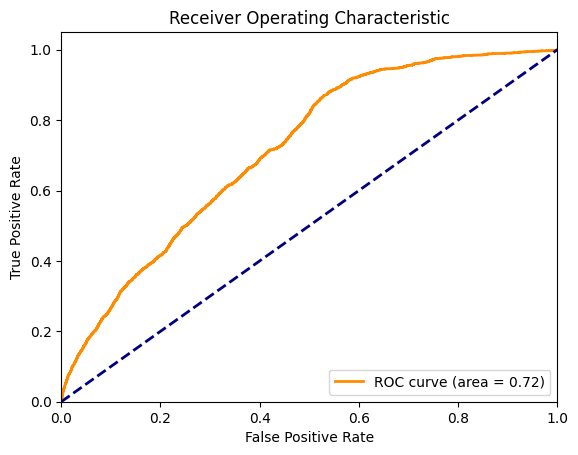

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print AUC
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [77]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange", label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()

### For train data

[0.         0.66902367 0.67094068 ... 0.95552519 0.95552519 1.        ]
[0.         0.05926098 0.05977214 ... 0.46285952 0.46286012 1.        ]
[            inf 1.00000000e+000 1.00000000e+000 ... 5.57400824e-309
 5.56764156e-309 0.00000000e+000]
ROC score: 0.900098913562119
Threshold value is: 7.388922291035723e-57


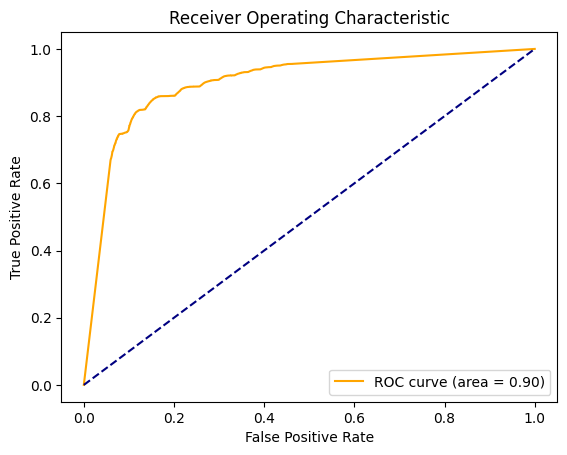

In [180]:
## Threshold for train data
fpr, tpr, thresholds = roc_curve(y_train_resampled,y_train_proba[:,1])
print(tpr)
print(fpr)
print(thresholds)
print("ROC score:",roc_auc_score(y_train_resampled, y_train_proba[:,1]))
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr,tpr)

In [197]:
new_train_pred=[]
for i in y_train_proba[:,1]:
    if i>0.44:
        a=1
    else:
        a=0
    new_train_pred.append(a)

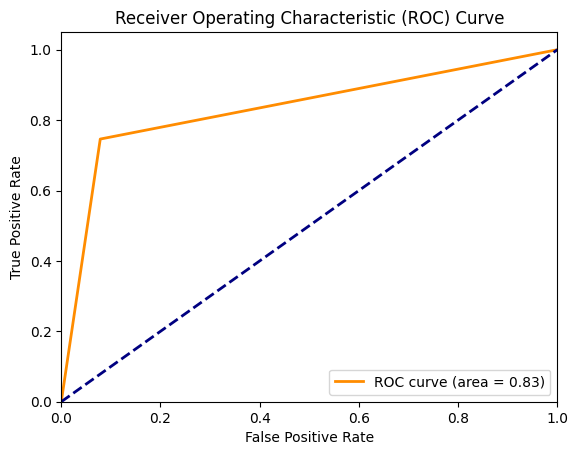

In [198]:
fpr, tpr, thresholds = roc_curve(y_train_resampled, new_train_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [177]:
print(classification_report(y_train_resampled, new_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85   1676567
           1       0.90      0.75      0.82   1676567

    accuracy                           0.83   3353134
   macro avg       0.84      0.83      0.83   3353134
weighted avg       0.84      0.83      0.83   3353134



### For test data

[0.         0.00111607 0.0014881  ... 1.         1.         1.        ]
[0.00000000e+00 3.00768212e-04 3.04945548e-04 ... 9.99181242e-01
 9.99832907e-01 1.00000000e+00]
[            inf 1.00000000e+000 1.00000000e+000 ... 1.97738191e-101
 1.58024526e-303 0.00000000e+000]
0.7155278750666135
Threshold value is: 0.4416736873411489


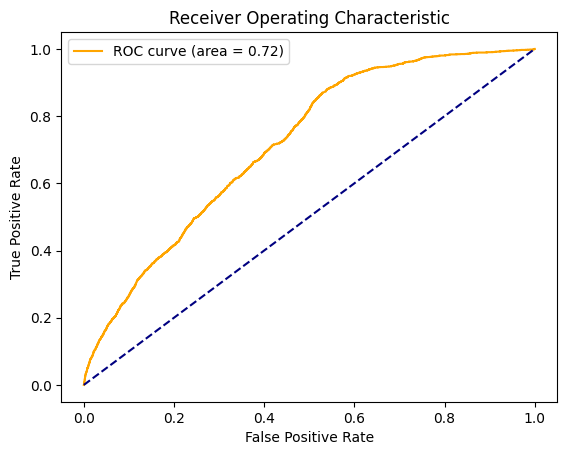

In [176]:
## Threshold for test data
fpr, tpr, thresholds = roc_curve(y_test,y_test_proba[:,1])
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, y_test_proba[:,1]))
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr,tpr)

In [173]:
new_test_pred=[]
for i in y_test_proba[:,1]:
    if i>0.44:
        a=1
    else:
        a=0
    new_test_pred.append(a)

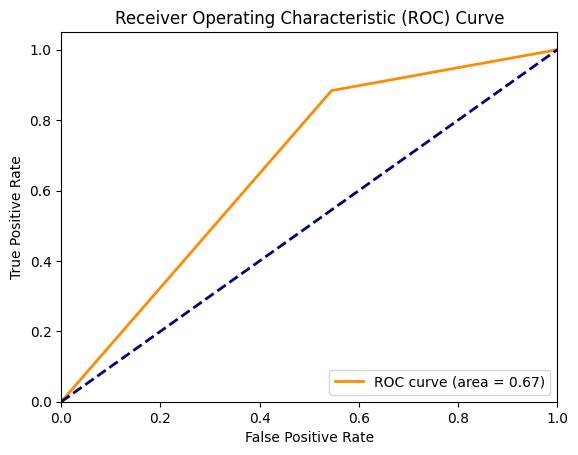

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, new_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [142]:
print(classification_report(y_test, new_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62    239387
           1       0.02      0.88      0.04      2688

    accuracy                           0.46    242075
   macro avg       0.51      0.67      0.33    242075
weighted avg       0.99      0.46      0.62    242075



              precision    recall  f1-score   support

           0       0.78      0.92      0.85   1676567
           1       0.90      0.75      0.82   1676567

    accuracy                           0.83   3353134
   macro avg       0.84      0.83      0.83   3353134
weighted avg       0.84      0.83      0.83   3353134



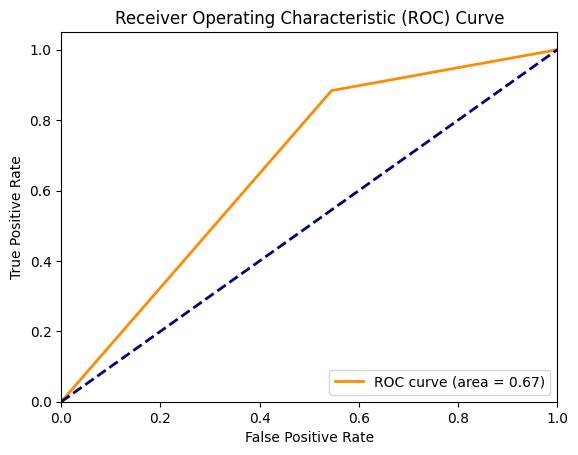

In [200]:
X.to_csv("X_train.csv",encoding='utf-8')
X_test.to_csv("X_test.csv", encoding='utf-8')

In [203]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_s,
    'Predicted_Prob': y_test_proba[:,1]
})

In [204]:
results_df.to_csv('model_predictions.csv', index=False)

In [208]:
X.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv", index=False)
y.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [206]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
242070    0
242071    0
242072    0
242073    0
242074    0
Name: went_on_backorder, Length: 242075, dtype: int64

In [210]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242075 entries, 0 to 242074
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Actual          242075 non-null  int64  
 1   Predicted       242075 non-null  int64  
 2   Predicted_Prob  242075 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.5 MB


In [211]:
X

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.99,0.99,0.0,1,1,1,0,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.99,0.99,0.0,1,1,1,0,1
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.99,0.99,0.0,0,1,1,0,1
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.10,0.13,0.0,1,1,1,0,1
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1,0.0,0.99,0.99,0.0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,1,0.0,0.69,0.69,5.0,0,1,1,0,1
1687856,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,1,0.0,0.99,0.99,1.0,1,1,1,0,1
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,1,0.0,0.86,0.84,1.0,0,1,1,1,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,1,0.0,0.86,0.84,6.0,1,1,1,0,1


In [212]:
X.to_csv("X_train1.csv",index=False)
X_test.to_csv("X_test1.csv", index=False)